In [1]:
# Import the relevant libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor



from IPython import display

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-11-04 00:24:36--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.1’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.009s  

2025-11-04 00:24:36 (97.0 MB/s) - ‘car_fuel_efficiency.csv.1’ saved [874188/874188]



In [3]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [4]:
df = df.fillna(0)
df.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [5]:
full_columns = list(df.columns)
categorical = list(df.dtypes[df.dtypes=='object'].index)
categorical

['origin', 'fuel_type', 'drivetrain']

In [6]:
numerical = list(df.dtypes[df.dtypes!='object'].index)
numerical

['engine_displacement',
 'num_cylinders',
 'horsepower',
 'vehicle_weight',
 'acceleration',
 'model_year',
 'num_doors',
 'fuel_efficiency_mpg']

In [7]:
neg_cols = []
for col in numerical:
    if ((df[col] < 0).sum() > 0):
        neg_cols.append(col)
        #df[df[col] < 0.0] = df[df[col] < 0.0] * -1
        df[col] = df[col].abs()
        print(neg_cols)


['num_doors']


In [8]:
neg_cols

['num_doors']

In [9]:
df.num_doors.value_counts()
#df.num_doors.describe()

num_doors
1.0    4375
0.0    4053
2.0    1157
3.0     114
4.0       5
Name: count, dtype: int64

In [10]:
# split the data into train/validation/test with 60%/20%/20% distribution
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [11]:
len(df) == len(df_train) + len(df_val) + len(df_test)

True

In [12]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [13]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [14]:
len(y_train) + len(y_val) + len(y_test)

9704

In [15]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [16]:
df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
0,120,5.0,169.0,2966.679505,13.9,2005,USA,Gasoline,Front-wheel drive,1.0
1,200,3.0,143.0,2950.822121,17.1,2013,Asia,Diesel,Front-wheel drive,1.0
2,180,6.0,180.0,3078.221669,17.4,2007,USA,Gasoline,All-wheel drive,0.0
3,280,5.0,174.0,2797.991793,0.0,2016,USA,Diesel,All-wheel drive,0.0
4,250,4.0,133.0,2362.426930,16.3,2010,USA,Diesel,Front-wheel drive,1.0


In [17]:
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

In [18]:
dv = DictVectorizer(sparse=True)

In [19]:
X_train = dv.fit_transform(train_dicts)
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 58220 stored elements and shape (5822, 14)>

In [20]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [21]:
X_val = dv.transform(val_dicts)
X_val

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 19410 stored elements and shape (1941, 14)>

In [22]:
y_pred = dt.predict(X_val)
y_pred

array([16.88218854, 16.88218854, 16.88218854, ..., 12.9383797 ,
       12.9383797 , 16.88218854], shape=(1941,))

In [23]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))


|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



In [24]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [25]:
y_pred = rf.predict(X_val)
y_pred

array([18.65493339, 15.1554956 , 18.16267996, ..., 14.75300012,
       13.65005892, 15.99094087], shape=(1941,))

In [26]:
def rmse(y_val, y_pred):
    square_error = (y_val - y_pred)**2
    MSE = np.mean(square_error)
    return np.sqrt(MSE)
    

In [27]:
rmse_score = rmse(y_val, y_pred)
rmse_score

np.float64(0.461762785806224)

In [28]:
scores = []
for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    score = rmse(y_val, y_pred)
    scores.append((n, score))
    

In [29]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
df_scores.rmse = np.round(df_scores.rmse, 3)
df_scores

,n_estimators,rmse
0,10,0.462
1,20,0.453
2,30,0.451
3,40,0.448
4,50,0.447
5,60,0.446
6,70,0.445
7,80,0.445
8,90,0.445
9,100,0.445


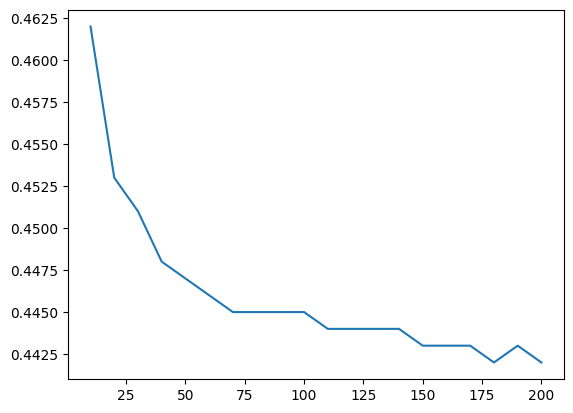

In [30]:
plt.plot(df_scores.n_estimators, df_scores.rmse)

In [31]:
mean_scores = []
scores = []
for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        score = rmse(y_val, y_pred)
        scores.append(score)
    mean_scores.append((d, np.mean(scores)))
    scores=[]

In [32]:
df_mean_scores = pd.DataFrame(mean_scores, columns=['max_depth','mean_rmse'])
df_mean_scores

,max_depth,mean_rmse
0,10,0.441921
1,15,0.445029
2,20,0.445315
3,25,0.445619


In [33]:
df_mean_scores.mean_rmse.min()

np.float64(0.44192058161577663)

In [34]:
rf.feature_importances_

array([1.17133476e-02, 3.32216905e-04, 3.35215231e-04, 3.34391217e-03,
       3.47168988e-04, 3.44013152e-04, 1.59761295e-02, 3.35918519e-03,
       2.27607329e-03, 1.06802746e-03, 4.53529959e-04, 4.86204569e-04,
       5.42658773e-04, 9.59422317e-01])

In [35]:
# Computing feature_importance_

rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=dv.get_feature_names_out())

print(feat_importances.sort_values(ascending=False))


vehicle_weight                  0.959185
horsepower                      0.016133
acceleration                    0.011565
engine_displacement             0.003372
model_year                      0.003337
num_cylinders                   0.002364
num_doors                       0.001130
origin=Europe                   0.000541
origin=USA                      0.000538
origin=Asia                     0.000466
drivetrain=All-wheel drive      0.000374
fuel_type=Diesel                0.000359
fuel_type=Gasoline              0.000328
drivetrain=Front-wheel drive    0.000307
dtype: float64


In [36]:
y_pred = rf.predict(X_val)
score = rmse(y_val, y_pred)

In [37]:
# XGBoost
!pip install xgboost


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [38]:
import xgboost as xgb

In [39]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [46]:
watchlist = [(dtrain, 'train'), (dval, 'val')]
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

[0]	train-rmse:1.81393	val-rmse:1.85444
[1]	train-rmse:1.31919	val-rmse:1.35397
[2]	train-rmse:0.98120	val-rmse:1.01386
[3]	train-rmse:0.75444	val-rmse:0.78745
[4]	train-rmse:0.60690	val-rmse:0.64390
[5]	train-rmse:0.51394	val-rmse:0.55737
[6]	train-rmse:0.45482	val-rmse:0.50381
[7]	train-rmse:0.41902	val-rmse:0.47294
[8]	train-rmse:0.39596	val-rmse:0.45529
[9]	train-rmse:0.38131	val-rmse:0.44468
[10]	train-rmse:0.37182	val-rmse:0.43794
[11]	train-rmse:0.36464	val-rmse:0.43457
[12]	train-rmse:0.35956	val-rmse:0.43332
[13]	train-rmse:0.35545	val-rmse:0.43373
[14]	train-rmse:0.35121	val-rmse:0.43331
[15]	train-rmse:0.34762	val-rmse:0.43314
[16]	train-rmse:0.34436	val-rmse:0.43328
[17]	train-rmse:0.34143	val-rmse:0.43344
[18]	train-rmse:0.33907	val-rmse:0.43361
[19]	train-rmse:0.33804	val-rmse:0.43369
[20]	train-rmse:0.33561	val-rmse:0.43313
[21]	train-rmse:0.33496	val-rmse:0.43320
[22]	train-rmse:0.33168	val-rmse:0.43324
[23]	train-rmse:0.33125	val-rmse:0.43359
[24]	train-rmse:0.33023	va

In [47]:
y_pred = model.predict(dval)

In [48]:
rmse(y_val, y_pred)

np.float64(0.4489961062398022)

In [49]:

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

[0]	train-rmse:2.28944	val-rmse:2.34561
[1]	train-rmse:2.07396	val-rmse:2.12434
[2]	train-rmse:1.88066	val-rmse:1.92597
[3]	train-rmse:1.70730	val-rmse:1.75002
[4]	train-rmse:1.55163	val-rmse:1.59074
[5]	train-rmse:1.41247	val-rmse:1.45003
[6]	train-rmse:1.28796	val-rmse:1.32345
[7]	train-rmse:1.17660	val-rmse:1.20946
[8]	train-rmse:1.07736	val-rmse:1.10846
[9]	train-rmse:0.98883	val-rmse:1.02011
[10]	train-rmse:0.91010	val-rmse:0.94065
[11]	train-rmse:0.84033	val-rmse:0.87089
[12]	train-rmse:0.77878	val-rmse:0.80907
[13]	train-rmse:0.72425	val-rmse:0.75462
[14]	train-rmse:0.67636	val-rmse:0.70782
[15]	train-rmse:0.63415	val-rmse:0.66675
[16]	train-rmse:0.59705	val-rmse:0.63064
[17]	train-rmse:0.56461	val-rmse:0.60018
[18]	train-rmse:0.53635	val-rmse:0.57389
[19]	train-rmse:0.51152	val-rmse:0.55052
[20]	train-rmse:0.49011	val-rmse:0.53109
[21]	train-rmse:0.47159	val-rmse:0.51492
[22]	train-rmse:0.45534	val-rmse:0.50042
[23]	train-rmse:0.44156	val-rmse:0.48848
[24]	train-rmse:0.42969	va

In [50]:
y_pred = model.predict(dval)

In [51]:
rmse(y_val, y_pred)

np.float64(0.4285966326701977)